# Operaciones basicas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

escalar = 99
matriz = np.array([[1,2,3],[4,5,6],[7,8,9]])
matriz2 = np.array([[5,77,3],[4,55,6],[7,65,9]])
vector = np.array([1,2,3])
tensor = np.array([
    [[0,153,0],[255,255,255],[255,0,0]],
    [[0,153,0],[102,51,0],[255,0,0]],
    [[0,153,0],[255,255,255],[255,0,0]],
])

## Transposición
Definimos a la **matriz transpuesta** como la matriz a la que le invertimos las filas por las columnas. Si teníamos una matriz de dimensiones *mxn* su transpuesta será una matriz de dimensión *nxm*.

La transpuesta tiene propiedades nos va a ayudar en las operaciones. Por ejemplo, para dividir sobre una matriz. 

Podemos ajustar el formato de los datos a nuestra conveniencia.

- El arreglo transpuesto se encuentra guardado en el atributo .T
- Por convención denotamos al transpuesto con un subíndice _t
- Sintaxis = A_t = A.T

Un **tensor también se puede transponer** en este caso se intercambiaran los elementos de manera que la jerarquía quede invertida. Sea un tensor de *mxnxp* el **tensor transpuesto** tendrá una dimensión de *pxnxm*

**Matriz**

In [2]:
print('Sin T:',matriz)
print('-'*50)
print('Con T',matriz.T)

Sin T: [[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------------------------------------------
Con T [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Tensor**

In [3]:
print('Sin T:',tensor)
print('-'*50)
print('Con T',tensor.T)

Sin T: [[[  0 153   0]
  [255 255 255]
  [255   0   0]]

 [[  0 153   0]
  [102  51   0]
  [255   0   0]]

 [[  0 153   0]
  [255 255 255]
  [255   0   0]]]
--------------------------------------------------
Con T [[[  0   0   0]
  [255 102 255]
  [255 255 255]]

 [[153 153 153]
  [255  51 255]
  [  0   0   0]]

 [[  0   0   0]
  [255   0 255]
  [  0   0   0]]]


## Suma de matrices y escalares:
Para la suma entre matrices, las 2 matrices deben tener la misma cantidad de filas y columnas (es decir, el mismo *mxn*). Se suma cada elemento de una matriz con su respectivo elemento de la otra matriz. 

In [4]:
matriz + matriz2

array([[ 6, 79,  6],
       [ 8, 60, 12],
       [14, 73, 18]])

## Broadcasting

Extender la dimension de menor tamaño para completar la de mayor tamaño.

Para la suma entre un **escalar** con una **matriz**, se suma el escalar por cada valor de la matriz.
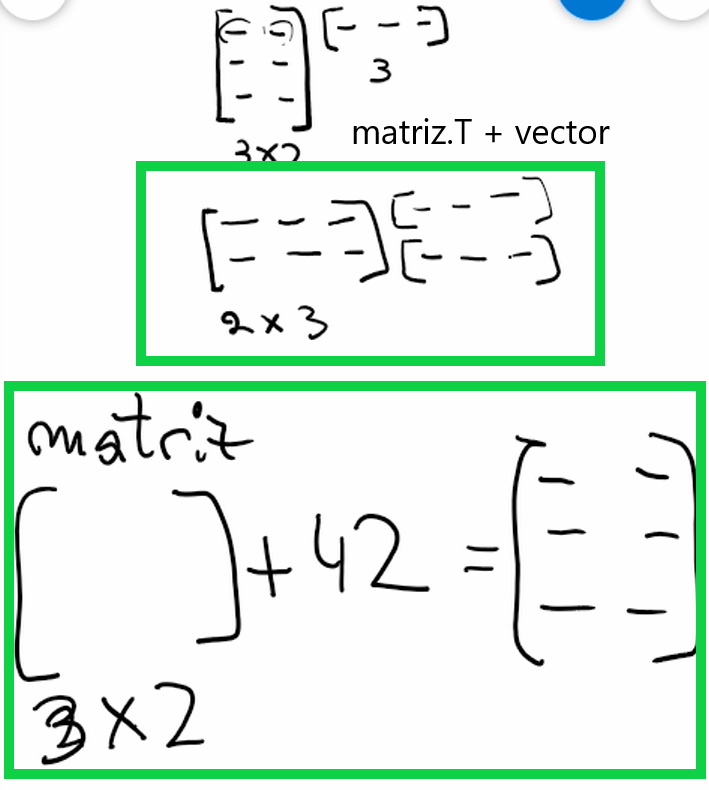

In [5]:
matriz.T + vector

array([[ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

Suma Matriz con Escalar

In [6]:
matriz+ escalar

array([[100, 101, 102],
       [103, 104, 105],
       [106, 107, 108]])

# Operaciones con matrices

## Producto interno

Producto interno entre una matriz y un vector.
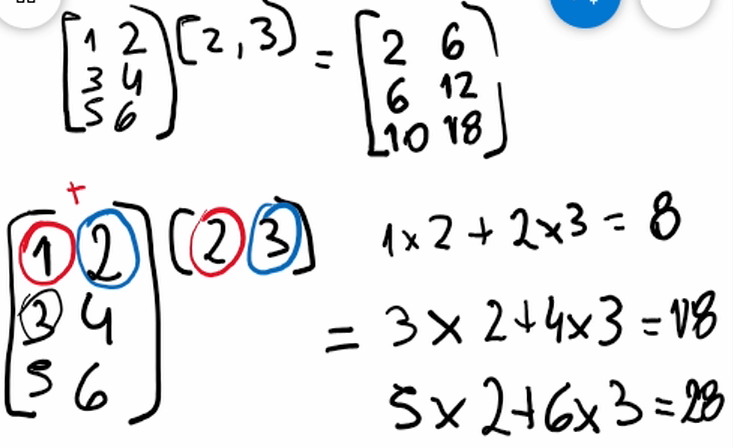

### Entre una matriz y un vector

**Opcion 1**:

In [7]:
vector = np.array([2,3])
matriz = np.array([[1,2],[3,4],[5,6]])
matriz.dot(vector)

array([ 8, 18, 28])

**Opcion 2**:

In [8]:
np.dot(matriz,vector)

array([ 8, 18, 28])

### Entre 2 matrices
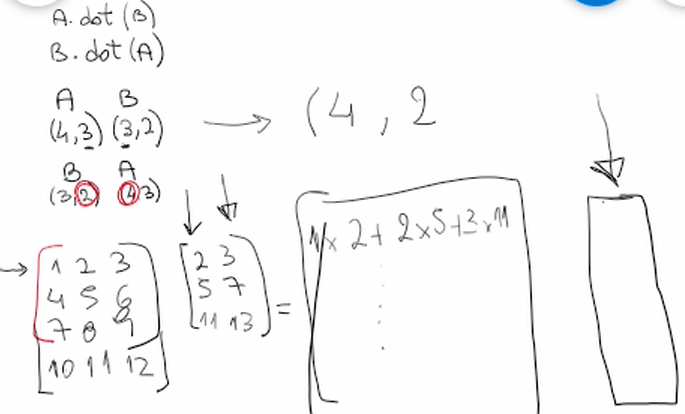

In [9]:
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
B = np.array([[2,3],[5,7],[11,13]])

A.dot(B)

array([[ 45,  56],
       [ 99, 125],
       [153, 194],
       [207, 263]])

```B.dot(A)```

**Error**:

ValueError: shapes (3,2) and (4,3) not aligned: 2 (dim 1) != 4 (dim 0)

In [10]:
# B.dot(A)

## Propiedades de las matrices y vectores

El producto interno de **++matrices ++**es:

- Asociativa: **Sí** Ax(BxC) = (AxB) x C
- Distributiva: **Sí** Ax(B+C) = (AxB) x (AxC)
- Conmutativa: **NO** BxC = CxB

El producto interno de **++vectores ++**es:

- Asociativa: **Sí** Ax(BxC) = (AxB) x C
- Distributiva: **Sí** Ax(B+C) = (AxB) x (AxC)
- Conmutativa: **Sí** BxC = CxB

### Matriz

In [11]:
A = np.array([[2,3],[5,7],[11,13]])
B = np.array([[1,3],[2,1]])
C = np.array([[3,1],[4,2]])

**Si es Asociativa**

In [12]:
A.dot(B.dot(C))

array([[ 60,  26],
       [145,  63],
       [295, 129]])

**Si es Destributiva**

In [13]:
A.dot(B).dot(C)

array([[ 60,  26],
       [145,  63],
       [295, 129]])

In [14]:
D = A.dot(B+C)
E = (A.dot(B))+(A.dot(C))
print(D)
print('-'*50)
print(E)
print('-'*50)
print(E==D)

[[ 26  17]
 [ 62  41]
 [122  83]]
--------------------------------------------------
[[ 26  17]
 [ 62  41]
 [122  83]]
--------------------------------------------------
[[ True  True]
 [ True  True]
 [ True  True]]


**No es Conmutativa**

In [15]:
F = B.dot(C)
G = C.dot(B)
print(F)
print('-'*50)
print(G)
print('-'*50)
print(F==G)

### Vector

**Si es Conmutativa**
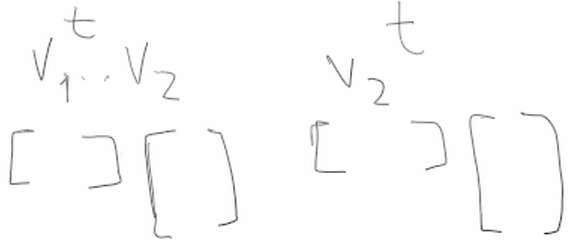

In [16]:
v1 = np.array([[2],[7]])
v2 = np.array([[3],[5]])
v1_tv2 = v1.T.dot(v2)
v2_tv1 = v2.T.dot(v1)
print(v1_tv2)
print('-'*50)
print(v2_tv1)

[[41]]
--------------------------------------------------
[[41]]


## Transposición de un producto de matrices

Es **muy útil** de poder operar con las matrices como si fueran números y poder **resolver un sistema lineal de ecuaciones** y sin tener que hacer todos los despejes que nos requeriría resolverlo.

In [17]:
A = np.array([[2,3],[5,7],[11,13]])
B = np.array([[1,3],[2,1]])

AB_t = A.dot(B).T
B_tA_t = B.T.dot(A.T)

print(AB_t == B_tA_t)

[[ True  True  True]
 [ True  True  True]]


In [18]:
print(AB_t)

[[ 8 19 37]
 [ 9 22 46]]


## Sistema de ecuaciones lineal

Podemos resolver un sistema de ecuaciones lineales a través de una operación matricial. La ventaja de este método es que es mucho más ordenado y transferible a la computadora.

La representación matricial AX=B es equivalente a un sistema de ecuaciones puesto que el producto interno también se puede ver como combinaciones lineales.

Nota:
Representación gráfica de rectas a través de matplotlib (plt)


### Solucion
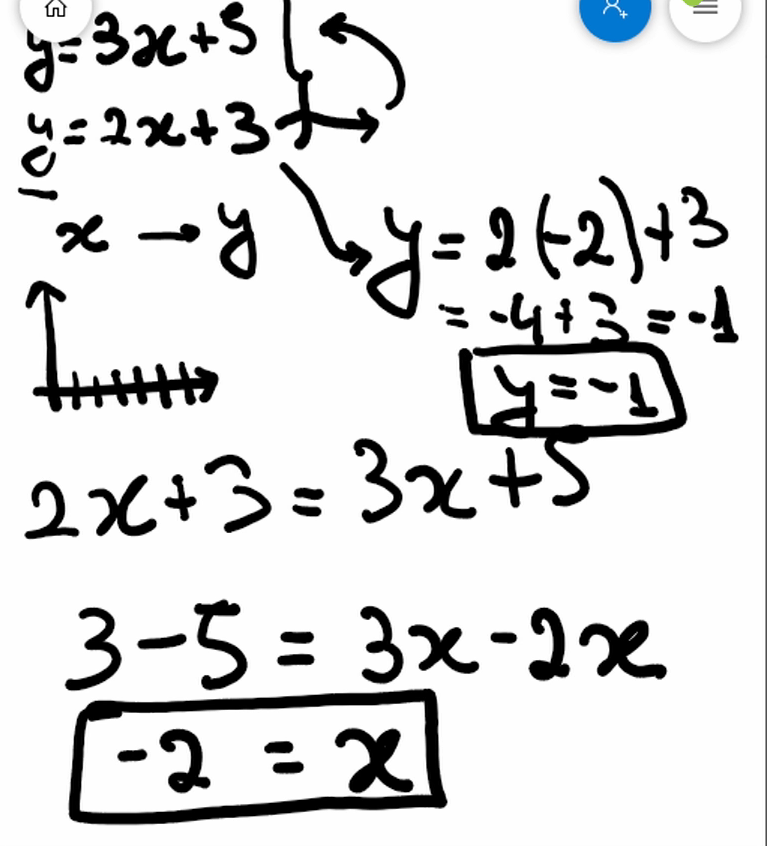

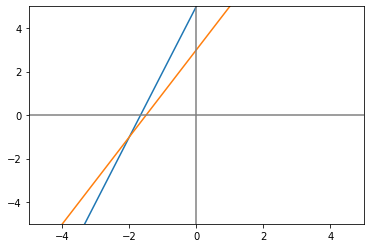

In [19]:
x = np.arange(-5,5)

y_1 = 3*x + 5
y_2 = 2*x + 3

plt.figure()

plt.plot(x, y_1)
plt.plot(x, y_2)

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

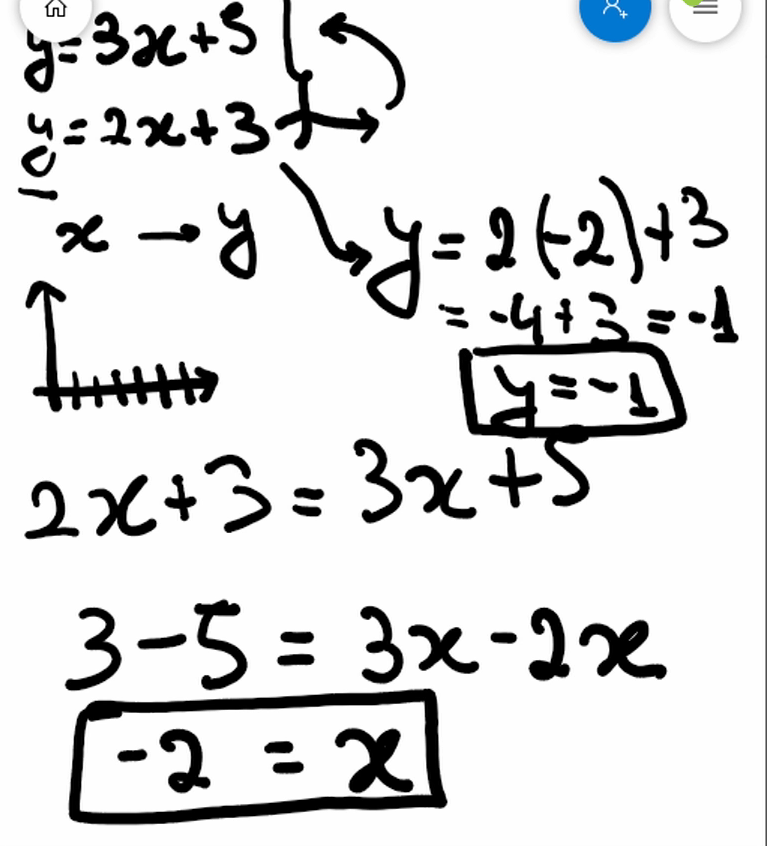

In [20]:
A = np.array([[-3, 1], [-2,1]])
print(A)

[[-3  1]
 [-2  1]]


In [21]:
b = np.array([[5],[3]])
print(b)

[[5]
 [3]]


In [22]:
sol_1 = np.array([-2,-1])


In [23]:
print(A.dot(sol_1))

[5 3]


## Tipos especiales de matrices

### Identidad

Es el elemento **neutro** de la multiplicación de matrices. Es decir que cualquier matriz multiplicada por la matriz identidad resulta la misma matriz. **Para generar una matriz identidad** de nxn en python se usa np.eye(n).

Cuando le damos un valor nos devuelve una matriz de esa dimension y con todos **unos en la diagonal** y **cero fuera de ellas**. Algo importante los datos generados estan en **flotante**.

In [24]:
itendidad = np.eye(4)
itendidad

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [25]:
vector = np.array([[2],[3],[5],[7]])

itendidad.dot(vector)

array([[2.],
       [3.],
       [5.],
       [7.]])

### Inversa
Una matriz es inversa de otra cuando la multiplicación de las matrices resulta en una matriz identidad (elemento inverso de la multiplicación de matrices).
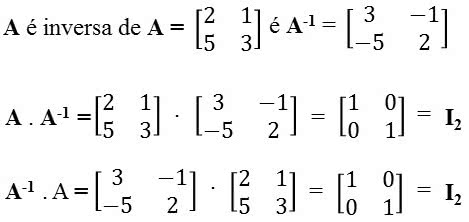

In [26]:
# inversa
A = np.array([[1,0,1],[0,1,1],[-1,1,1]])
A

array([[ 1,  0,  1],
       [ 0,  1,  1],
       [-1,  1,  1]])

In [27]:
inversa_a = np.linalg.inv(A)
inversa_a

array([[ 0.,  1., -1.],
       [-1.,  2., -1.],
       [ 1., -1.,  1.]])

Cuando aplicamos el poducto interno a la inversa de A. **Obtenemos la identidad**.

In [28]:
A.dot(inversa_a)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Singular
Una matriz es singular cunado **no tienen inversa**. Todas las matrices que **no son cuadradas** son singulares.

In [29]:
singular = np.array([[1,1],[1,1]])
singular

array([[1, 1],
       [1, 1]])

Al intentar calcular su inversa podremos observar que nos genera un **error*.
```
np.linalg.inv(singular)

***ERROR***
LinAlgError: Singular matrix
```

## Resolver un sistema de ecuaciones lineales
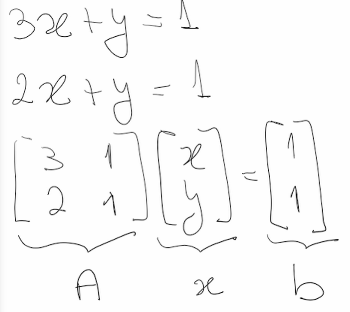

In [30]:
#Si tengo un numero que muy cercano a cero, pero tiene muchos decimales que solo nos muestre un CERO.
np.set_printoptions(suppress=True)

A = np.array([[3,1],[2,1]])
b = np.array([[1],[1]])
A

array([[3, 1],
       [2, 1]])

In [31]:
inversa_A = np.linalg.inv(A)
inversa_A

array([[ 1., -1.],
       [-2.,  3.]])

Al obtener el valor de **x**. Podremos observar que al sistema lineal **no le importa la primera cordenada**.

Comprobacion:
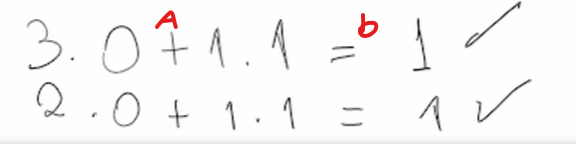

In [32]:
x = inversa_A.dot(b)
x

array([[0.],
       [1.]])

In [33]:
#b
A.dot(x)

array([[1.],
       [1.]])

**Solucion 2**:
Es utilizar la misma inversa para calcular otro sistema lineal  de ecuacions que tamga los mismos coeficiente multiplicando las variables, pero que este igualado a otors resultados.
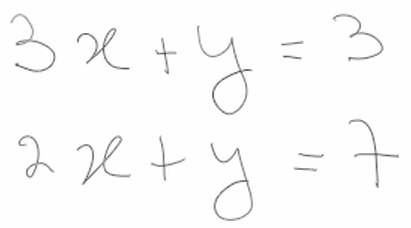

In [34]:
sol_2 = inversa_A.dot(np.array([[3],[7]]))
sol_2

array([[-4.],
       [15.]])

In [35]:
A.dot(sol_2)

array([[3.],
       [7.]])

# Sistema de ecuaciones lineales

## Tipos de soluciones

- **Incompatible o sobredeterminado**: Cuando no hay soluciones para el sistema. Hay más ecuaciones que incógnitas
- **Compatible determinado**: Cuando el sistema tiene una única solución. Hay tantas ecuaciones como incógnitas (convergen en un sólo punto)
- **Compatible indeterminado**: Cuando hay infinitas soluciones. Hay menos ecuaciones que incógnitas.

**Sistema sobredeterminado**: tenemos mas ecuaciones que variables, entonces no tiene solución.

**Sistema con soluciones infinitas**: Cuando tenemos una sola variable

### Sobredeterminado (Sin solución)
Porque las tres ecuaciones deberian estar cruzado en un unico punto y es un **sistema sobredeterminado**

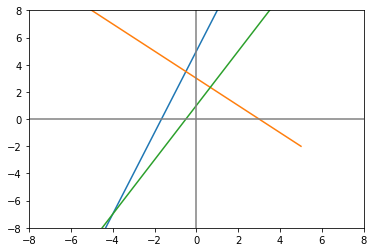

In [36]:
x = np.arange(-6,6)

y_1 = 3*x+5
y_2 = -x+3
y_3 = 2*x+1

plt.figure()
plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.axvline(x=0, color="grey")
plt.axhline(y=0, color="grey")
plt.show()

### Compatible determinado (Con una solución)

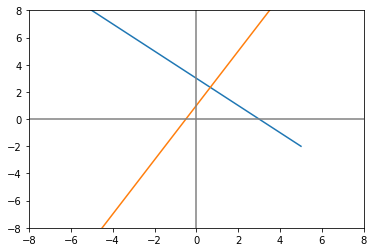

In [37]:
x = np.arange(-6,6)

y_2 = -1*x+3
y_3 = 2*x+1

plt.figure()
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.axvline(x=0, color="grey")
plt.axhline(y=0, color="grey")
plt.show()

### Compatible indeterminado (Con infinitas soluciones)
Es cuando nos quedamos unicamente con unas de las variables.

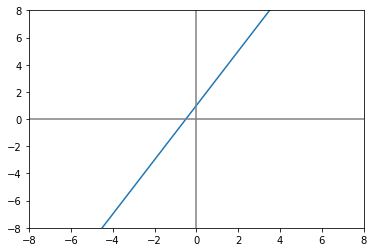

In [38]:
x = np.arange(-6,6)

y_3 = 2*x+1

plt.figure()

plt.plot(x, y_3)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.axvline(x=0, color="grey")
plt.axhline(y=0, color="grey")
plt.show()

## Graficar vectores

In [39]:
v1 = np.array([2,5])
v2 = np.array([3,2])

%run "func_aux/graficar_vectores.ipynb"
# def graficarVectores(vecs, cols, alpha=1):
#     plt.figure()
#     plt.axvline(x=0, color="grey", zorder=0)
#     plt.axhline(y=0, color="grey", zorder=0)
    
#     for i in range(len(vecs)):
#         # El origen de los vectores inicia en el punto (0,0)
#         x = np.concatenate([[0,0], vecs[i]])
#         plt.quiver(
#             [x[0]],
#             [x[1]],
#             [x[2]],
#             [x[3]],
#             angles='xy',
#             scale_units='xy',
#             scale=1,
#             color=cols[i],
#             alpha=alpha
#         )

(-1.0, 8.0)

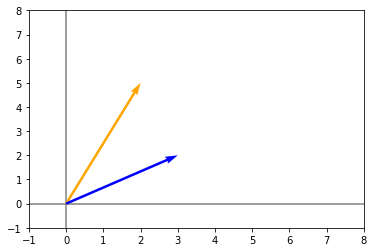

In [40]:
graficarVectores([v1,v2],['orange', 'blue'])
plt.xlim(-1,8)
plt.ylim(-1,8)

## Combinación líneal
Es **multiplicar** a un vector por un escalar, **a otro** vector por otro escalar y **sumar** el resultado de ambos para obtener un **nuevo vector**.

a * v1 + b * v2

In [41]:
%run "func_aux/graficar_vectores.ipynb"

v1 = np.array([2,5])
v2 = np.array([3,2])

v1_tv2 = 2*v1+v2
v1_tv2

array([ 7, 12])

(-1.0, 12.0)

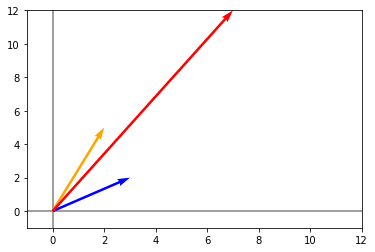

In [42]:
graficarVectores([v1,v2,v1_tv2],['orange','blue','red'])
plt.xlim(-1,12)
plt.ylim(-1,12)

Definir una funcion para graficar todas las posibles combinaciones, nos permitira tener una mejor nocion de la importancia de las combinaciones lineales.

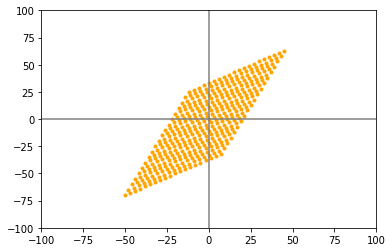

In [43]:
for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(
            v1[0] * a + v2[0] * b, 
            v1[1] * a + v2[1] * b,
            marker='.',
            color='orange'
        )
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

## ¿Qué es un espacio y un subespacio?
Espacio euclidiano o Espacio vectorial es el conjunto de n-adas ordenadas, tambien conocido por espacio n-dimencional y de denota por Rn este es una sucesión de n números reales ejemplo (a1,a2,…,an) donde los vectores Rn se clasifican así:

**R1 **= espacio unidimensional, línea recta real.

**R2 **= espacio bidimensional, pares ordenados.

**R3 **= espacio tridimensional, terna ordenadas.

- **Hiperplano**: una dimension menos el espacio donde estamos trabajando

**Si trabajamos en R3 un hiperplano es R2, si trabajamos en R2 un hiperplano es la recta. **

### Espacio
2 vectores son linealmente dependientes cuando son coplanares o proporcionales entre sí. Es decir que al multiplicar uno por un escalar, ya estamos teniendo la combinación lineal de ambos. Por ejemplo:

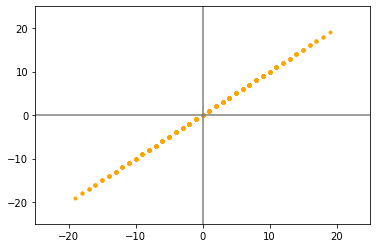

In [44]:
v1 = np.array([1, 1])
v2 = np.array([-1, -1])

for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker = '.',
                   color = "orange")
        
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

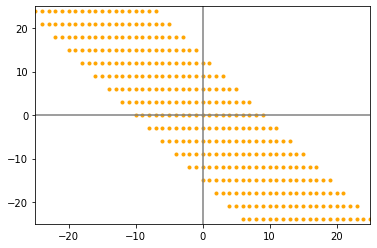

In [45]:
v1 = np.array([1, 0])
v2 = np.array([2, -3])

for a in range(-10,10):
    for b in range(-10,10):
        plt.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   marker = '.',
                   color = "orange")
        
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.show()

Tenemos entonces una recta, y no un plano en R2, ya que son linealmente dependientes.

Esto en sí mismo, es un espacio. Pero en R1. Es un subespacio de R2, o un hiperplano de R2.

Otro ejemplo pero en R3:

### Subespacio
Al tener su elemento $k$ los 2 en 0, son linealmente dependientes.

Por lo tanto obtenemos un plano en R2 en un espacio R3. Otra vez, es un subespacio o un hiperplano de R3.

Está en Z = 0, pasa que está torcida la vista del gráfico

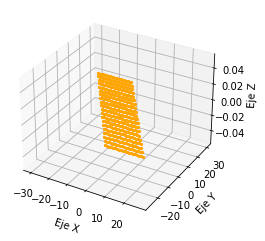

In [46]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([1, 0, 0])
v2 = np.array([2, -3, 0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for a in range(-10,10):
    for b in range(-10,10):
        ax.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   v1[2]*a + v2[2]*b,
                   marker = '.',
                   color = "orange")
        
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

Para contrastar, este sería un plano en R3:

Dónde si tiene componentes en z . (Si los vectores tienen 0 en la misma componente, son LD. No importa si es X,Y o Z)

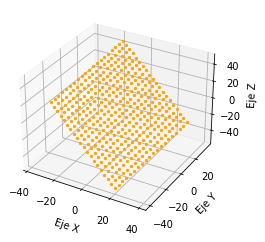

In [47]:
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([1, 3, 2])
v2 = np.array([-3, 1, 3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for a in range(-10,10):
    for b in range(-10,10):
        ax.scatter(v1[0]*a + v2[0]*b, v1[1]*a + v2[1]*b,
                   v1[2]*a + v2[2]*b,
                   marker = '.',
                   color = "orange")
        
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

## Vectores linealmente independientes

Un conjunto de vectores es linealmente independiente **Si** ningunno de ellos se puede escribir como combinacion lineal de los otros vectores. 

**En otras palabras**. El espacio generado por v1 y v2 es el mismo que genera solamente usando v1 o v2. Al usar los dos vectores al mismo tiempo se puede observar que no nos aporta ninguna informacion y una nueva dimension.

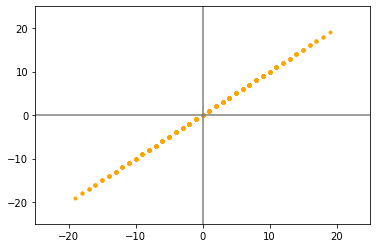

In [54]:
v1 = np.array([1, 1])
v2 = np.array([-1, -1])

for a in range(-10,10):
    for b in range(-10, 10):
        plt.scatter(v1[0]*a+v2[0]*b, v1[1]*a+v2[1]*b,
                   marker = '.',
                   color = 'orange')
        
plt.xlim(-25,25)
plt.ylim(-25,25)

plt.axvline(x=0, color = "grey")
plt.axhline(y=0, color = "grey")

plt.show()

In [51]:
print(v1 == -1 * v2)

[ True  True]


## Validar que una matriz tenga inversa
Para que un sistema de ecuaciones lineales tenga **solucion** se necesita que la matriz **A** que representa este sistema de ecuaciones sea **cuadrada** y que todos sus vecotres sean **linealmente independiente**. En otras palabras no puede haber filas y columnas que puedan ser escrito como combinacion de las otras filas y columnas

In [59]:
A = np.array([
    [0,1,0,0],
    [0,0,1,0],
    [0,1,1,0],
    [1,0,0,1]
])

### Descomponer matriz
Para identificar si una linea es **Linealmente Dependiente** es usando auto vectores o valores (**.eig** Es una forma de descomponer nuestra matriz).

Se puede interpretar como la suma de los vectores:


In [60]:
lambdas, V = np.linalg.eig(A.T)

print(A[lambdas == 0, :])

[[0 1 1 0]]


```
np.linalg.inv(A)

LinAlgError: Singular matrix
```
Si eliminamos las filas 1 y 4 que son dependientes no hubieramos obtenido una matriz cuadrada.
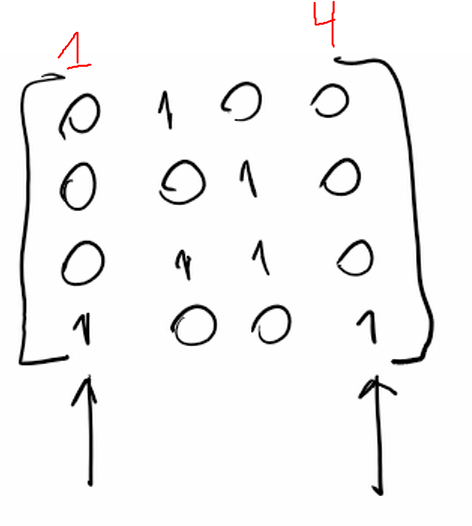

LinAlgError: Singular matrix

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e75321e8-1037-437c-8037-4042716c25af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>